# 제32회 ADP 실기 대비 - 핵심만 요약한 통계와 머신러닝 파이썬 코드북

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 설정

# Colab 한글 폰트 설정
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rcParams['font.family'] = 'NanumBarunGothic'

# 10장. 비지도 학습 알고리즘
- 비지도 학습(Un-supervised learning)은 기계 학습의 일종으로, 데이터가 어떻게 구성되었는지를 알아내는 문제의 범주에 속한다.
- 이 방법은 지도 학습(Supervised learning) 혹은 강화 학습(Reinforcement learning)과는 달리 입력값(Features)에 대한 목표치(Target)가 주어지지 않는다.
- 비지도 학습 알고리즘으로는 차원 축소(Dimension reduction), 군집화(Clustering), 연관규칙학습(Association rule learning) 등이 있다.

## 10-1. 차원 축소
- 높은 차원의 데이터, 즉 특성이 많은 데이터는 많은 알고리즘의 계산 비용을 높이기 때문에 차원 축소(Dimension reduction)는 매우 중요하다.
- 또한 차원을 줄임으로써 데이터의 노이즈를 없애고 더 좋은 학습 결과를 얻을 수 있으며, 데이터셋을 다루기 쉬워지고, 결과를 이해하기도 쉬워진다.
- 차원을 축소하는 방법으로는 기존의 특징들 중 유용한 특징을 골라 선택하는 방법(Feature selection)과 기존 특징들을 사용해서 새로운 특징을 만드는 방법(Feature extraction) 그리고, 군집화(Clustering)을 통해 더 적은 수의 특징을 사용하는 방법이 있다.
- 그 중에서도 특징 추출(Feature extraction)하는 방법으로 주성분 분석(PCA, Principal Component Analysis), LSA(Latent semantic analysis = Truncated SVD), 요인 분석(FA, Factor Analysis), 독립성분 분석(ICA, Independent Component Analysis), 음수 미포함 행렬 분해(NMF, Non-negative matrix factorization), 다차원 척도법(MDS, Multi Dimensional Scaling), t-SNE 등이 있다.

- 다음에서는 주성분 분석, 요인 분석, 독립성분 분석, 음수 미포함 행렬 분해, 다차원 척도법의 방법으로 다차원의 'wine' 데이터를 차원 축소하고, 원본 데이터와 차원 축소한 데이터로 학습한 모델의 성능을 비교해보고자 한다.

### 주성분 분석(PCA, Principal Component Analysis)
- 변수들은 공변(Covary)하는 경우가 많기 때문에 어느 한 변수에서의 일부 변화는 실제로 다른 변수에서의 변화에 의해 중복되기도 한다.
- 예를 들어, 강수량과 습도는 함께 변한다.
- 주성분 분석은 수치형 변수가 어떤 식으로 공변하는지 알아내는 기법이다.
- 다차원 데이터를 분산이 큰 방향에서부터 순서대로 축을 다시 잡는 방법으로, 변수 간 종속성이 클수록 더 소수의 주성분으로 데이터를 표현할 수 있다.
- 다만 각 특징이 정규분포를 따르는 조건을 가정하므로 왜곡된 분포를 가진 변수를 주성분 분석에 적용하는 것은 적절하지 않다.
- 또한, 특징들의 척도가 상이하면 올바른 주성분 방향을 찾을 수 없기 때문에 표준화와 같은 변수변환이 필요하다.

[주요 개념]
- 주성분(Principal component): 예측변수들에 가중치를 적용한 선형결합이며, 분산이 가장 큰 방향 즉, 데이터에서 가장 많은 정보를 담고 있는 방향으로서 예측변수들의 상관관계가 가장 큰 방향을 의미한다. 첫번째 주성분은 전체 변동성을 가장 잘 설명하는 선형결합이다.
    - 두번째 주성분은 첫번째 주성분과 서로 수직이며 나머지 변동성을 설명한다. 만약 추가적인 성분이 있다면 추가된 성분은 다른 성분들과 서로 수직이다.
- 고유벡터(Eigen-vectors): $Av=\lambda V$에서 행렬 A를 선형변환으로 봤을 때 선형변환 A에 의한 변환 결과가 자기 자신의 상수배(고유값)가 되는 0이 아닌 벡터(V)를 말한다. 예측변수들을 성분으로 변형할 때 사용되는 가중치로서 부하(Loading)라고도 한다.
    - scikit-learn, PCA의 attribute 중, components_로 값이 반환된다.
- 고유값(Eigen-values): 각 축들로 크기를 재설정해 주는 값, 상수배값($\lambda$)을 뜻한다.
    - scikit-learn, PCA의 attribute 중 explained_variance_로 값이 반환된다. 전체 차원의 고유값의 합은 특성의 개수에 근사한다.
- 특이값 분해 방식(SVD, Singular Value Decomposition): 주성분 분석은 SVD 방식을 사용해 주성분을 찾는다.
    - 특이값은 scikit-learn, PCA의 attribute 중 singular_values_로 값이 반환된다.

[장단점]
- 고차원의 데이터를 손실을 최소화하면서 효율적으로 축소할 수 있다.
- 반면, 그래프의 두 축을 해석하기가 쉽지 않다. 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태이기 때문이다.
- 또한, 선형변환의 한계로서 데이터의 비선형 구조를 반영하지 못한다.

In [2]:
# 데이터 불러오기
from sklearn.datasets import load_wine

load = load_wine()
X = pd.DataFrame(load['data'], columns=load['feature_names'])
y = load['target']

print(f"feature {X.shape[1]}개, data {X.shape[0]}개")

# 데이터 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# PCA 적합
from sklearn.decomposition import PCA
model = PCA(n_components=X.shape[1], svd_solver='auto') # 전체 feature 수를 입력
model.fit(scaled_X)

# 고유값 요약
e_value = pd.DataFrame({
    "고유값" : model.explained_variance_, 
    "기여율" : model.explained_variance_ratio_},
index=[i for i in range (1, X.shape[1]+1)])

e_value['누적기여율'] = e_value['기여율'].cumsum()
print("고유값 요약:")
e_value

feature 13개, data 178개
고유값 요약:


,고유값,기여율,누적기여율
1,4.732437,0.361988,0.361988
2,2.511081,0.192075,0.554063
3,1.454242,0.111236,0.665300
4,0.924166,0.070690,0.735990
5,0.858049,0.065633,0.801623
6,0.645282,0.049358,0.850981
7,0.554141,0.042387,0.893368
8,0.350466,0.026807,0.920175
9,0.290512,0.022222,0.942397
10,0.252320,0.019300,0.961697


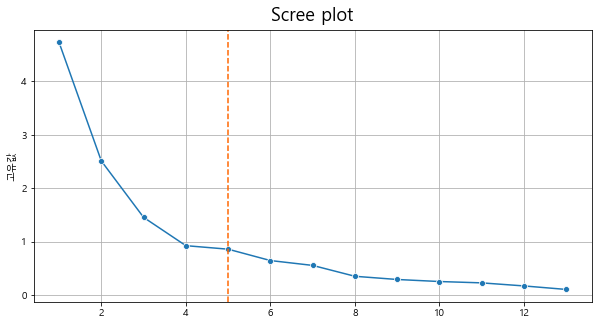

In [3]:
# 고유값 scree plot: elbow 지점의 성분까지 주성분으로 하여 차원 축소 할 수 있다.
# comp1~5가 전체 분산의 80%를 설명하고 있으므로 n_components를 5로 하여 fit_transform하고 차원 축소된 데이터를 얻을 수 있다.

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(x=e_value.index, y='고유값', marker='o', data=e_value, ax=ax)
ax.grid()
ax.set_title("Scree plot", fontsize=18, pad=9)

for i, v in enumerate(e_value['누적기여율']):
    if v > 0.8:
        ax.axvline(e_value.index[i], ls='--', color='#ff6600')
        best_dim = i+1 # 누적기여율이 처음으로 0.8 이상이 되도록 하는 차원 수
        break

plt.show()

In [4]:
# 차원 축소하여 PCA 적합
model = PCA(n_components=best_dim, svd_solver='auto') # best_dim 입력
model.fit(scaled_X)
PCA_result = model.fit_transform(scaled_X) # 차원 축소 결과

# 고유벡터 요약
e_vector = pd.DataFrame(model.components_, index=[i for i in range(1, best_dim+1)], columns=scaled_X.columns)
print("고유벡터 요약")
e_vector.iloc[:, :5]

고유벡터 요약


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium
1,0.144329,-0.245188,-0.002051,-0.239320,0.141992
2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634
3,-0.207383,0.089013,0.626224,0.612080,0.130757
4,-0.017856,0.536890,-0.214176,0.060859,-0.351797
5,-0.265664,0.035214,-0.143025,0.066103,0.727049


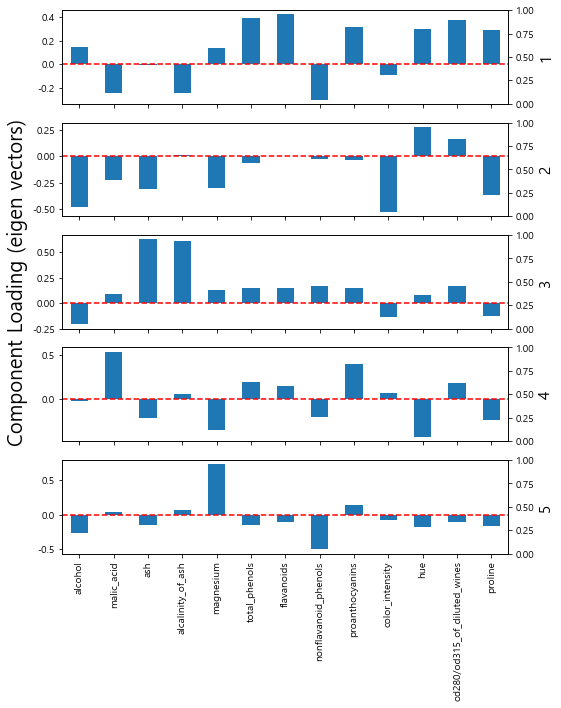

In [5]:
# 고유벡터 plot: feature의 고유벡터값이 클수록 해당 주성분에 영향을 많이 주는 feature임
fig, axes = plt.subplots(best_dim, 1, figsize=(8, 10))
for i, ax in enumerate(axes):
    e_vector.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(e_vector.columns))))
    ax.set_xticklabels([" " for i in range(len(e_vector.columns))])
    
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(e_vector.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
    
ax.set_xticks(list(range(len(e_vector.columns))))
ax.set_xticklabels(list(e_vector.columns))
axes[round(best_dim/2)].set_ylabel("Component Loading (eigen vectors)", fontsize=20)
plt.show()

In [ ]:
# biplopt을 통한 PCA 결과 해석
# 1. 각 PC축에 가깝게 평행을 이루는 변수가 해당 PC에 영향을 가장 많이 주는 변수이다.
# 2. 각 빨간선의 길이는 원변수의 분산을 표현, 길이가 길수록 분산이 크다.
# 3. 각 빨간선이 가까울수록 서로 상관관계가 있다.

from pca import pca
model = pca(n_components=5)
model.fit_transform(scaled_X)

fig, ax = model.biplot(n_feat = X.shape[1], legend=False, figsize=(10, 10))
plt.show()
plt.close()

### 요인 분석(Factor analysis)
- 요인 분석은 변수들 간의 상관관계를 분석하여 공통 차원들을 통해 축약하는 통계기법으로서 다수 변수들의 정보 손실을 최소화하면서 소수의 요인으로 축약하는 것이다.
- 예를 들어, 13개의 관측된 변수(Variable)들의 분산(Variance)은 5개의 관측되지 않은 근본적인 변수로 설명될 수 있다.
- 요인 분석은 이러한 잠재 변수에 대해 연결된 분산(Joint variation)을 찾고, 여기에 오차(Error)를 추가한 인자들의 선형 결합으로 관측된 변수들을 표현한다.
- PCA의 주성분은 다른 성분들보다 중요한데 반해, FA의 잠재변수들을 기본적으로 대등한 관계를 갖는다.

- 요인 분석은 탐색 요인 분석(EFA, Exploratory Factor Analysis)과 확인 요인 분석(CFA, Confirmatory Factor Analysis)으로 나눌 수 있다.
- 변수가 어느 요인에 부합될지에 대한 가설이 없으면 탐색 요인 분석을 진행하고, 변수와 요인에 대한 특정한 가설을 토대로 요인 분석모델과 자료가 부합하는지 확인하려면 확인 요인 분석을 진행한다.
- 요인 분석을 통해 변수 축소(여러 개의 관련 있는 변수들이 하나의 요인으로 묶임), 불필요한 변수 제거(요인에 포함되지 않거나 포함되더라도 중요도가 낮은 변수를 찾을 수 있음), 변수 특성 파악(관련된 변수들이 묶임으로써 요인들의 상호독립적인 특성을 파악), 요인점수를 이용한 변수 생성 등을 할 수 있다.

In [7]:
# 데이터 불러오기
from sklearn.datasets import load_wine

load = load_wine()
X = pd.DataFrame(load['data'], columns=load['feature_names'])
y = load['target']
print(f"feature {X.shape[1]}개, data {X.shape[0]}개")

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

# FA 적합
from sklearn.decomposition import FactorAnalysis
best_dim = 5 # 잠재변수 5개
model = FactorAnalysis(n_components=best_dim)
model.fit(scaled_X)
FA_result = model.transform(scaled_X)

# 각 잠재요인의 feature별 최대 분산
max_var = pd.DataFrame(model.components_, index=['latent%s' %i for i in range(1, best_dim+1)], columns=load['feature_names'])
print(f"잠재 요인 요약:\n {max_var.iloc[:, :5]}")

feature 13개, data 178개
잠재 요인 요약:
           alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
latent1  0.299731   -0.424489  0.143386          -0.387691   0.275096
latent2 -0.423886   -0.283977 -0.866066          -0.364116  -0.409356
latent3 -0.576480   -0.039512  0.368996           0.537425  -0.228729
latent4 -0.117865   -0.148264 -0.013634          -0.073661   0.668697
latent5 -0.194167    0.157465 -0.071648           0.239827   0.209583


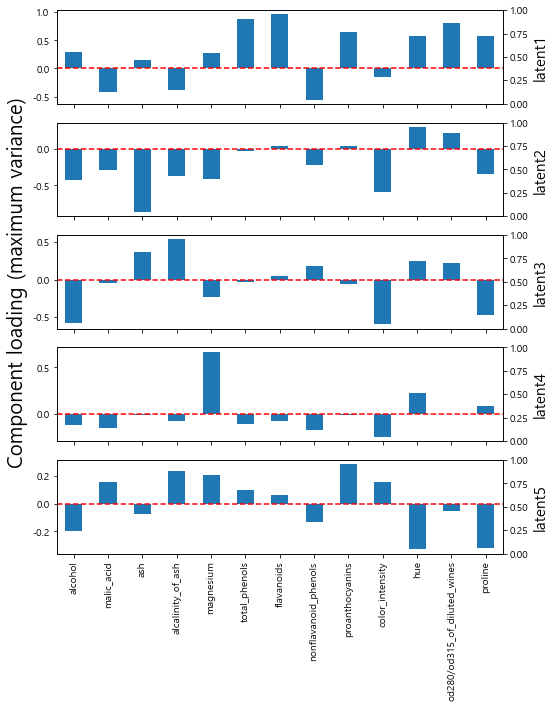

In [8]:
# 각 잠재요인의 feature별 최대 분산 시각화
fig, axes = plt.subplots(best_dim, 1, figsize=(8, 10))
for i, ax in enumerate(axes):
    max_var.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(max_var.columns))))
    ax.set_xticklabels([" " for i in range(len(max_var.columns))])
    
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(max_var.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
    
ax.set_xticks(list(range(len(max_var.columns))))
ax.set_xticklabels(list(max_var.columns))
axes[round(best_dim / 2)].set_ylabel("Component loading (maximum variance)", fontsize=20)
plt.show()

### 독립성분 분석 (ICA, Independent component analysis)
- 독립성분 분석은 다변량의 신호를 최대한 독립적인 추가 하부 성분으로 분리하는 방법이다.
- 일반적으로 ICA는 차원을 줄이기 위해 사용하는 것이 아니라 중첩된 신호를 분리하는데 사용한다.
- ICA 모델에는 잡음항이 포함되어 있지 않기 때문에 모델이 정확하려면 백색화가 필요하다.
- scikit-learn에서는 whiten=True로 파라미터 설정함으로써 백색화 할 수 있다.
- ICA의 예로, 실내에서 녹음된 여러 사람의 대화에서 특정 인물의 목소리를 빼내는 음원 분리가 있다.
- 이 기법은 예측되는 성분의 통계적 독립성을 최대화하도록 그 독립 성분(요소, 잠재적 변수, 소스 등)을 찾는다.
- ICA의 알고리즘으로는 Infomax, FastICA, JADE 등이 있다.

In [9]:
# 데이터 불러오기
from sklearn.datasets import load_wine

load = load_wine()
X = pd.DataFrame(load['data'], columns=load['feature_names'])
y = load['target']
print(f"feature {X.shape[1]}개, data {X.shape[0]}개")

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

# ICA 적합
from sklearn.decomposition import FastICA
best_dim = 5
model = FastICA(n_components=best_dim, algorithm='parallel', whiten=True, fun='logcosh')
model.fit(scaled_X)
ICA_result = model.transform(scaled_X)

# 독립 소스를 얻기 위해 데이터에 적용할 선형 연산자
ind_comp = pd.DataFrame(model.components_, index=['ind comp%s' %i for i in range(1, best_dim+1)], columns=load['feature_names'])
print(f"독립 성분 요약:\n {ind_comp.iloc[:, :5]}")

feature 13개, data 178개
독립 성분 요약:
             alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
ind comp1  0.019018    0.006846  0.007757          -0.002793  -0.064235
ind comp2  0.006545   -0.007872 -0.041639          -0.036651  -0.012648
ind comp3  0.026361    0.011581  0.003065          -0.010863   0.007322
ind comp4 -0.008112    0.040533 -0.018962           0.006622  -0.013381
ind comp5  0.004437   -0.010040  0.000676          -0.007910   0.003292


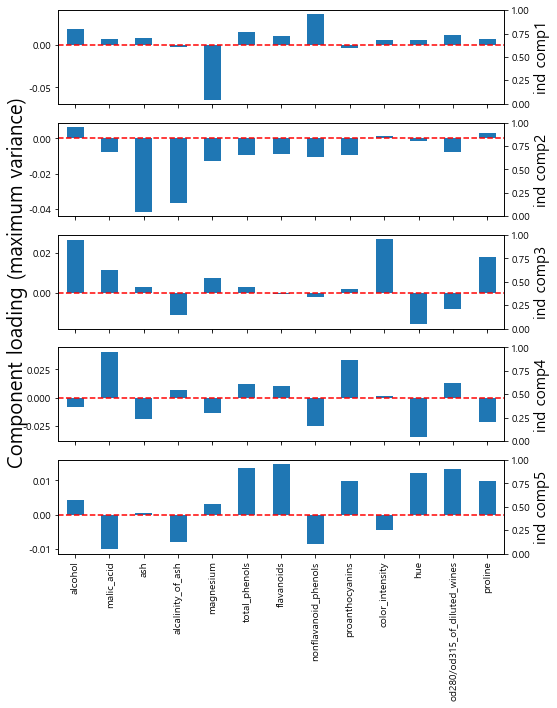

In [10]:
# 각 잠재요인의 feature별 최대 분산 시각화
fig, axes = plt.subplots(best_dim, 1, figsize=(8, 10))
for i, ax in enumerate(axes):
    ind_comp.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(ind_comp.columns))))
    ax.set_xticklabels([" " for i in range(len(ind_comp.columns))])
    
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(ind_comp.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
    
ax.set_xticks(list(range(len(ind_comp.columns))))
ax.set_xticklabels(list(ind_comp.columns))
axes[round(best_dim / 2)].set_ylabel("Component loading (lienar operator)", fontsize=20)
plt.show()

### 음수 미포함 행렬 분해 (NMF, Non-negative matrix factorization)
- 음수 미포함 행렬 분해는 데이터와 구성 요소가 음수가 아니라고 가정하에 진행하는 분해 방법이다.
- 이 방법은 데이터 X를 음수를 포함하지 않는 두 개의 행렬 W와 H로 분해하는데, 데이터 X와 행렬 WH 사이의 거리인 d를 최적화하면서 진행한다.
- 거리 d는 주로 squared Frobenius norm으로 계산한다.
- PCA와는 달리 벡터 표현은 구성 요소를 빼지 않고 겹쳐서 덧셈 방식으로 얻는다. 이러한 추가적인 모델은 이미지와 텍스트를 표현하는 데 효율적이다.
- 이 분해는 차원 축소, 소스 분리, 또는 주체 추출에 사용할 수 있다.

In [11]:
# 데이터 불러오기
from sklearn.datasets import load_wine

load = load_wine()
X = pd.DataFrame(load['data'], columns=load['feature_names'])
y = load['target']
print(f"feature {X.shape[1]}개, data {X.shape[0]}개")

# 데이터 표준화 (0~1 사이에 데이터가 오도록 MinMaxScaler를 사용)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
scaled_X = pd.DataFrame(mm.fit_transform(X), columns=X.columns)

feature 13개, data 178개


In [12]:
# NMF 적합
from sklearn.decomposition import NMF

best_dim = 5
model = NMF(n_components=best_dim, init='random', max_iter=2000)
model.fit(scaled_X)
NMF_result = model.transform(scaled_X) # W에 해당

# H에 해당 (Factorization matrix)
NMF_comp = pd.DataFrame(model.components_, index=['NMF comp%s' %i for i in range(1, best_dim+1)], columns=load['feature_names'])
print(f"NMF 성분 요약:\n {NMF_comp.iloc[:, :5]}") # 5개 feature까지만 조회

NMF 성분 요약:
             alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
NMF comp1  0.146315    0.118935  0.058784           0.005900   0.000000
NMF comp2  0.590371    0.000000  0.256466           0.000000   0.305869
NMF comp3  0.447456    1.002446  0.404611           0.527291   0.099363
NMF comp4  0.000000    0.000000  0.522787           0.646741   0.455611
NMF comp5  0.059002    0.000000  0.266817           0.291434   0.000000


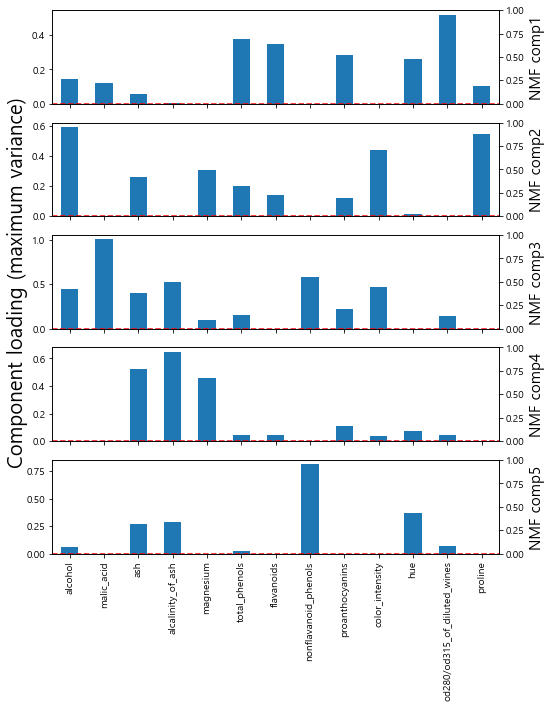

In [13]:
# 각 성분의 feature별 시각화
fig, axes = plt.subplots(best_dim, 1, figsize=(8, 10))
for i, ax in enumerate(axes):
    NMF_comp.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(NMF_comp.columns))))
    ax.set_xticklabels([" " for i in range(len(NMF_comp.columns))])
    
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(NMF_comp.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
    
ax.set_xticks(list(range(len(NMF_comp.columns))))
ax.set_xticklabels(list(NMF_comp.columns))
axes[round(best_dim / 2)].set_ylabel("Component loading (Factorization matrix)", fontsize=20)
plt.show()

### 다차원 척도법(MDS, Multi-dimensional scaling)
- 다차원 척도법이란, 원래 데이터의 고차원 공간에서의 거리를 잘 반영하는 저차원 데이터를 찾는 방법이다.
- 관측 대상들의 상대적 거리의 정확도를 높이기 위해 적합 정도를 stress 값으로 나타내며, 반복 알고리즘을 통해 stress 값을 최소로 하는 모형을 최종 모형으로 정한다.
- stress는 0에 가까울수록 적합도가 완벽하다고 보며, 0.1 이하는 적합도가 좋다고 보지만, 0.15 이상일 경우, 적합도가 나쁘다고 본다.
- 크루스칼(Kruskal)의 stress는 (MDS 차원 축소된 데이터 간 거리와 실제 데이터 간 거리의 차이의 제곱합) / (실제 데이터 간 거리의 제곱합)의 제곱근으로 구한다.
- scikit-learn의 클래스 MDS의 atrribute인 .stress_를 추가적으로 계산하여 구할 수 있다.
- 이처럼 stress 값은 실제 데이터 간의 거리와 MDS로 추정된 거리 간의 차이, 즉 일종의 오차의 크기를 나타내는 지수이다.
- 스크리 플롯(Scree plot)을 통해 차원의 수를 늘려가면서 stress 값의 변화를 추적하여 엘보우 방법(elbow method)으로 최적의 차원 수를 결정한다.

- 한편, MDS는 계량적 MDS(Metric MDS)와 비계량적 MDS(Non-metric MDS)로 나뉘어지는데, 계량적 MDS는 데이터가 구간척도나 비율척도인 경우 활용한다.
- 개체들 간의 유클리드 거리 행렬을 계산하고 개체들 간의 비유사성을 공간상에 표현한다.
- 비계량적 MDS는 데이터가 서열척도인 경우 활용한다. 개체들 간의 거리가 순서로 주어진 경우에는 서열척도를 거리의 속성과 같도록 변환하여 거리를 생성한 후 적용한다.
- scikit-learn에서는 metric의 파라미터를 True로 하면 계량적 MDS, False로 하면 비계량적 MDS 방식으로 계산한다.
- scikit-learn의 MDS를 사용할 경우, 개체들 간의 거리가 이미 계산된 dissimilarity matrix가 있는 경우 파라미터 dissimilarity='precomputed'로 설정한 후 적합하면 된다.
- 개체들의 피처들을 통해 개체들 간 거리를 계산해야 하는 경우, 거리 지표를 지정해주면 된다.

feature 13개, data 178개
차원 수 2일 때, stress 0.2301572646914574
차원 수 3일 때, stress 0.14421638408180104
차원 수 4일 때, stress 0.10153475198496566
차원 수 5일 때, stress 0.07167081747123694
차원 수 6일 때, stress 0.05262312447954536


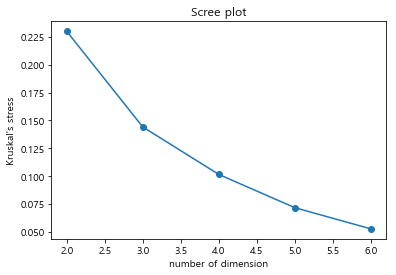

In [14]:
# 데이터 불러오기
from sklearn.datasets import load_wine

load = load_wine()
X = pd.DataFrame(load['data'], columns=load['feature_names'])
y = load['target']
print(f"feature {X.shape[1]}개, data {X.shape[0]}개")

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

# 데이터 간의 실제 거리 계산하기
from sklearn.metrics import pairwise_distances
distances = pairwise_distances(scaled_X) # metric='euclidean'

# 최적의 차원 수 찾기
Slist = []

from sklearn.manifold import MDS

for i in range(2, 7):
    mds = MDS(n_components=i, metric=True, random_state=0)
    mds.fit(scaled_X)
    
    # reduced_d = pairwise_distances(mds.embedding_) # 차원 축소된 데이터 간의 거리
    # distances = mds.dissimilarity_matrix_ 데이터 간 실제 거리
    sklearn_stress = mds.stress_ # ~ 0.5*np.sum((distances-reduced_d)**2)
    kruskal_stress = np.sqrt(sklearn_stress / (0.5 * np.sum(distances**2))) # stress - 1
    Slist.append(kruskal_stress)
    print(f"차원 수 {i}일 때, stress {round(kruskal_stress, 3)}")
    
# scree plotting
plt.title("Scree plot")
plt.plot(list(range(2, 7)), Slist, marker='o')
plt.xlabel("number of dimension")
plt.ylabel("Kruskal's stress")
plt.show()

In [15]:
# MDS 적합
best_dim = 5
model = MDS(n_components=best_dim, metric=True)
MDS_result = pd.DataFrame(model.fit_transform(scaled_X)) # model.embedding_과 동일
reduced_d = pairwise_distances(model.embedding_)

print(f"raw stress: {round(model.stress_, 3)} (~ {round(0.5 * np.sum(distances - reduced_d) ** 2, 3)})")
print(f"Kruskal's stress: {round(np.sqrt(model.stress_ / (0.5 * np.sum(distances ** 2))), 3)} (~ {round(np.sqrt(np.sum((distances-reduced_d)**2)/np.sum(distances**2)), 3)})")

raw stress: 2120.068 (~ 2405582.434)
Kruskal's stress: 0.072 (~ 0.072)


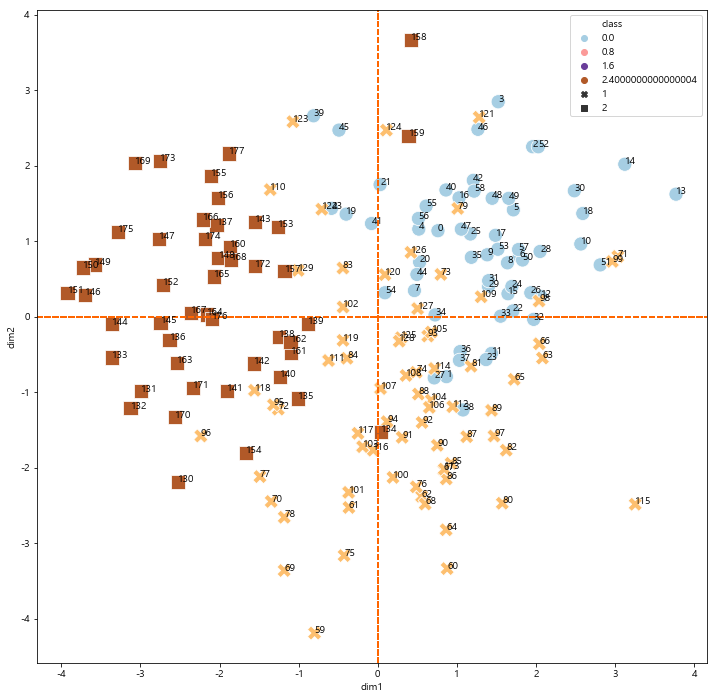

In [16]:
reduced_data = pd.DataFrame(np.c_[MDS_result.values, y], columns=['dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'class'])

sns.scatterplot(x='dim1', y='dim2', data=reduced_data, style='class', style_order=[0, 1, 2], hue='class', palette='Paired', s=200)

for i, name in enumerate(MDS_result.index):
    plt.text(reduced_data.loc[i, 'dim1'], reduced_data.loc[i, 'dim2'], name)
    plt.axhline(0, 0, ls='--', color='#ff6600')
    plt.axvline(0, 0, ls='--', color='#ff6600')
    
# MDS에 의해 축소된 feature로 그린 산점도로부터 wine 종류 간의 비유사도를 확인할 수 있다.
plt.show() 

### 원본 데이터와 차원 축소 데이터로 적합한 모델 성능 비교
- 13개의 특성을 가진 원본 데이터와 5개의 특성으로 차원 축소한 데이터로 학습한 선형 회귀 모델의 성능들을 비교해 보았다.
- 차원 축소한 데이터의 모델들은 특성이 반 이상 줄어들었음에도 불구하고, 원본 데이터에 근사한 test score를 나타냈다.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data_list = [scaled_X, PCA_result, FA_result, ICA_result, NMF_result, MDS_result]
title_list = ['original', 'PCA', 'FA', 'ICA', 'NMF', 'MDS']
y = load['target']

for X, title in zip(data_list, title_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
    lr = LinearRegression().fit(X_train, y_train)
    trainS, testS = lr.score(X_train, y_train), lr.score(X_test, y_test)
    
    print(f"{title} data:")
    print(f"train score: {round(trainS, 4)}, test score: {round(testS, 4)}")

original data:
train score: 0.8904, test score: 0.9151
PCA data:
train score: 0.827, test score: 0.8279
FA data:
train score: 0.8765, test score: 0.8805
ICA data:
train score: 0.827, test score: 0.8279
NMF data:
train score: 0.8273, test score: 0.8449
MDS data:
train score: 0.7977, test score: 0.7792


## 10-2. 군집 분석 (Clustering)
- 레이블이 없는 데이터를 분류하는 경우, 모델을 훈련시킬 수 있는 응답변수가 없으므로 군집 분석을 통해 공통적인 패턴을 식별하고 분류할 수 있다.
- 이렇게 얻은 그룹들은 분류 용도로 사용하거나 다른 학습 모델의 변수로 사용할 수 있다.
- 군집 분석은 거리 기반으로 모델링을 하기 때문에 분석 전 데이터 표준화가 필요하다.
- 또한, 이상치에 민감하게 반응하므로 이상치의 제거나 조정이 필요하다.
- 모든 설명 변수를 고려하여 모델링하기 때문에 중요하지 않은 변수가 모델에 추가될수록 정확도가 낮아진다.

[종류]
- 계층적 군집분석 (Hierarchical clustering)
    - 합병형(Agglomerative) = 군집간 거리척도/연결법(Linkage method):
        - 단일(최단) 연결법(Single linkage method)
        - 평균 연결법(Average linkage method)
        - Ward 연결법(Ward linkage method)
        - 완전(최장)연결법(Complete linkage method)
        - 중심연결법(Centroid linkage method)
    - 분리형(Top-down): DIANA method (Divisive analysis)

- 비계층적 군집 분석 = 분할적 군집(Partitional clustering)
    - 프로토타입(Prototype-based): 연속형 데이터는 K-means clustering, K-median clustering, 범주형 데이터는 K-medoid clustering, K-mode clustering 등
    - 분포기반(Distribution-based) 혹은 모델기반: 혼합분포군집(Mixture distribution clustering)
    - 밀도기반(Density-based): DBSCAN, OPTICS, DENCLUE 등
    - 격자기반(Grid-based clustering): STING, WaveCluster, CLIQUE 등
    - 기타: 커널 기반 군집, 그래프 기반 코호넨 군집 등  

### 10-2-1. 계층적 군집 분석(Hierarchical clustering)
- 계층적 클러스터링을 통해 서로 다른 수의 클러스터를 지정하는 과정을 시각화 할 수 있다.
- 특이점이나 비정상적인 그룹을 발견하기도 쉽고, 클러스터를 해석하기가 수월하다.
- 하지만 계층적 클러스터링은 대규모 데이터에는 적용할 수 없다.
- 합병형(Agglomerative) 알고리즘은 단일 레코드로 구성된 클러스터에서 시작하여 유사한 클러스터들을 반복적으로 병합하며 더 큰 클러스터들을 만들어간다.

[클러스터 합병 방법]
- 완전연결법(Complete linkage)은 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합친다. 비슷한 멤버가 있는 클러스터를 만드는 경향이 있다.
- 단일연결법(Single linkage)은 두 클러스터의 데이터 간 최소 거리를 사용하는 방식이다. 그 결과로 나온 클러스터는 서로 크게 다른 요소들을 포함하는 일도 생길 수도 있다.
- 평균연결법(Average linkage)은 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합친다. 모든 거리 상의 평균을 사용하는 방법으로 이는 단일연결과 완전연결법 사이를 절충한 방법이다.
- 최소분산법(Ward's method)은 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합친다. 그래서 크기가 비교적 비슷한 클러스터가 만들어진다. 클러스터 내의 제곱합을 최소화하므로 k-평균과 유사하다고 할 수 있다.

- 덴드로그램(Dendrogram)을 통해 계층 군집을 시각화 할 수 있다
- 덴드로그램의 y축으로부터 병합 알고리즘에서 두 군집이 합쳐질 때를 확인할 수 있으며, 가지의 길이를 통해 합쳐진 클러스터가 얼마나 멀리 떨어져 있는지를 알 수 있다.

[[101. 142.   0.   2.]
 [  7.  39.   0.   2.]
 [ 10.  48.   0.   2.]]


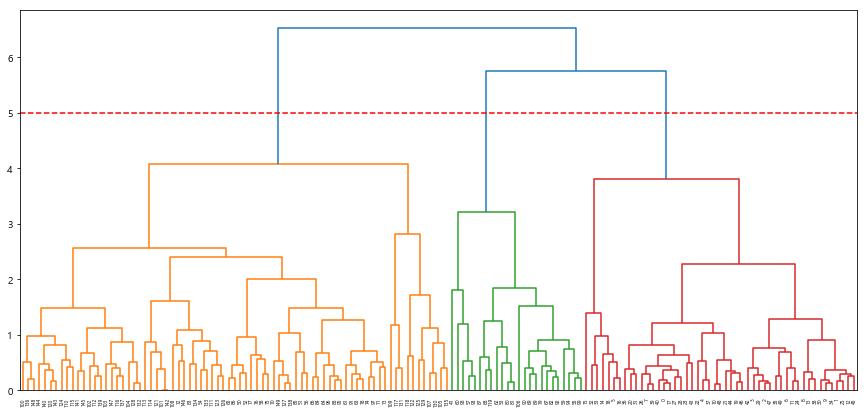

In [18]:
# 합병형 군집분석
from sklearn.datasets import load_iris

# 데이터 불러오기
X = load_iris()['data']
y = load_iris()['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load_iris()['feature_names']))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(X), columns=columns)

from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
# 군집화 상세내역 매트릭스
Z = linkage(df, method='complete')
print(Z[:3, :].round())

# linkage의 method는 single, complete, average, weighted, centroid, median, ward로 입력할 수 있다.
# 위의 Z는 4열로 된 matrix인데, 0열과 1열은 인덱스, 2열은 0~1열 인덱스 쌍의 거리, 3열은 클러스터 내 관찰값의 개수를 반환한다.
# 0, 1열에서 인덱스 값이 관찰값 이상으로 296, 297까지 나오는 이유는 그 상위에 병합된 클러스터들이 관찰값에 이어서 새로운 인덱스로 생성되기 때문이다.

# 군집화 결과 시각화
distance_setting = 5

fig, ax = plt.subplots(figsize=(15, 7))

# color_threshold 값을 설정하면 해당 거리값을 기준으로 색상이 다른 군집들을 나눠줌
dendrogram(Z, labels=list(df.index), color_threshold=distance_setting) 
plt.xticks(rotation=90)
ax.axhline(y=distance_setting, linestyle='dashed', color='red')
plt.show()

In [19]:
# n_cluster로 정한 군집의 개수를 기반으로 각 데이터의 군집을 반환
n_cluster = 3

Hclustering_result = cut_tree(Z, n_cluster).flatten()
Hclustering_result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
# 타당성 평가: clustering한 군집번호와 target의 군집번호가 꼭 일치할 필요는 없고, 유사한 데이터들끼리 군집화만 잘 되어있으면 된다.
from sklearn.metrics import silhouette_score, completeness_score
print(f"실루엣 계수: {round(silhouette_score(df, Hclustering_result), 3)}")
print(f"completeness_score: {round(completeness_score(y, Hclustering_result), 3)}")

실루엣 계수: 0.45
completenes_score: 0.685


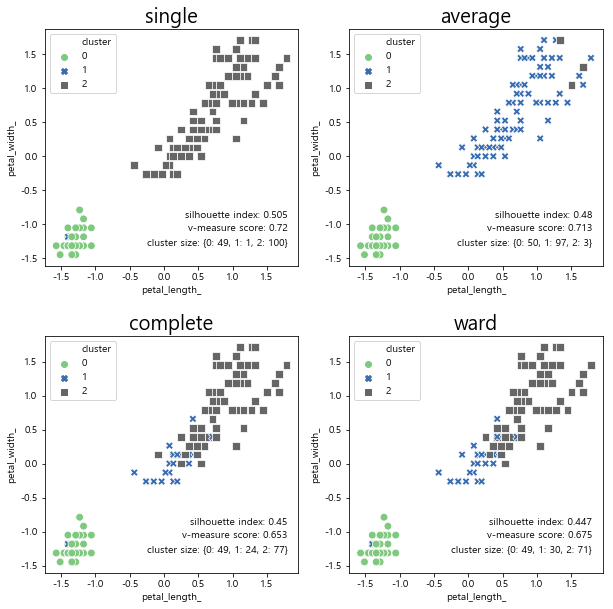

In [21]:
# 비유사도 측정 지표 별 군집 결과 비교
from collections import Counter
from sklearn.metrics import silhouette_score, v_measure_score

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.3)

methods = ['single', 'average', 'complete', 'ward']
for ax, method in zip(axes.ravel(), methods):
    Z = linkage(df, method=method)
    cluster = pd.DataFrame({'cluster' : cut_tree(Z, 3).flatten()})
    ddf = pd.merge(df, cluster, left_index=True, right_index=True)
    sns.scatterplot(x='petal_length_', y='petal_width_', data=ddf, hue='cluster', style='cluster', s=60, ax=ax, palette='Accent')
    
    ax.text(1.8, -0.9, f'silhouette index: {round(silhouette_score(df, ddf["cluster"]), 3)}', horizontalalignment='right')
    ax.text(1.8, -1.1, f'v-measure score: {round(v_measure_score(load_iris()["target"], ddf["cluster"]), 3)}', horizontalalignment='right')
    
    cluster_size = dict(Counter(ddf['cluster']))
    ax.text(1.8, -1.3, f'cluster size: {cluster_size}', horizontalalignment='right')
    ax.set_title(method, fontsize=20)

# 평가 점수 자체는 single이 가장 높게 나왔지만 시각화된 군집 고려했을 때 complete과 ward의 군집화 결과가 타당하게 보인다.
plt.show() 

### 10-2-2. 비계층적 군집 분석

#### K-means clustering
- K-means는 사용자가 미리 정한 k값과 클러스터 평균의 초기값을 가지고 알고리즘을 시작하며 다음의 과정을 반복한다.
- 먼저, 각 데이터를 거리가 가장 가까운 평균(Clutser center: 하나의 스칼라 값이 아닌 각 변수들의 평균으로 이루어진 벡터)을 갖는 클러스터에 할당한다.
- 그리고 새로 할당된 데이터들로 새로운 클러스터 평균을 계산한다.
- 각 데이터에 대한 클러스터 할당이 더 변하지 않으면 클러스터링이 종료된다.
- K-means는 이러한 반복을 통해 클러스터 내 데이터와 클러스터 평균의 오차제곱합이 최소가 되도록 한다.
- 이 방법이 항상 최적의 답을 준다는 보장이 없기 때문에 클러스터 평균의 초기값을 무작위로 변화시켜가며 알고리즘을 여러 번 돌려봐야 한다.

[군집 개수 k 정하는 방법]
- 엘보우 방법, 즉 군집 개수 k에 따른 오차제곱합을 시각화하여 오차제곱합이 평평해지기 시작하는 지점으로 k를 정한다.
- 다만, 군집화가 잘 되지 않은 데이터에서는 눈에 띄는 팔꿈치 위치가 없을 수 있다.
- scikit-learn에서는 KMeans의 attribute인 .inertia_가 클러스터 평균과 샘플 사이의 거리 제곱합을 반환하기 때문에 이를 활용할 수 있다.

[장단점]
- K-means는 비교적 이해하기 쉽고 구현도 쉬울 뿐만 아니라 비교적 빠르기 때문에 가장 인기 있는 군집 알고리즘이다.
- 또한, 대용량 데이터셋에서도 잘 작동한다.
- 반면, K-means는 클러스터 평균의 초기값에 따라 다른 결과를 얻게 된다.
- 이 때문에 scikit-learn에서 제공하는 KMeans 클래스는 서로 다른 난수 초기값으로 반복함으로써 클러스터 분산의 합이 작은 최선의 결과를 얻도록 한다.
- 또한, 클러스터의 모양을 가정하고 있기 때문에 활용범위가 비교적 제한적이다.
- 또한, K-means 알고리즘의 핵심인 평균은 이상치에 민감하다. 대신 중앙값을 사용하면, 계산 비용은 더 높지만 노이즈를 효율적으로 제거할 수 있다.

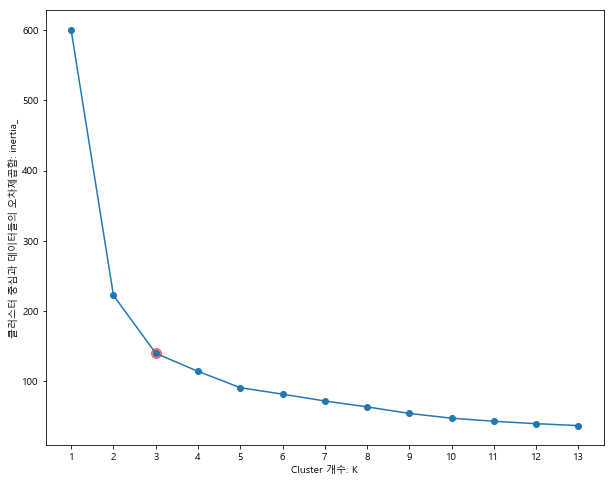

In [22]:
# 데이터 불러오기
from sklearn.datasets import load_iris

load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load['feature_names']))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(X), columns=columns)

from sklearn.cluster import KMeans
# 적정한 군집 개수 정하기
I = [] # 오차제곱합
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k).fit(df)
    I.append(kmeans.inertia_) # 오차제곱합
    
plt.figure(figsize=(10, 8))
plt.plot(list(range(1, 14)), I, marker='o')
n_cluster = 3
plt.scatter(n_cluster, I[n_cluster-1], color='red', alpha=0.5, s=100)
plt.xticks(list(range(1, 14)), list(range(1, 14)))
plt.xlabel("Cluster 개수: K")
plt.ylabel("클러스터 중심과 데이터들의 오차제곱합: inertia_")
plt.show()

In [23]:
# n_cluster로 정한 군집의 개수를 기반으로 각 데이터의 군집을 반환
model = KMeans(n_clusters=n_cluster, random_state=0)
distances = model.fit_transform(df) # 해당 열 데이터의 각 cluster center와의 거리
kmeans_result = model.labels_ # 각 데이터의 군집 반환
kmeans_result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [24]:
# 군집 정보 확인
print(f"클러스터 구성: {Counter(model.labels_)}")
centers = pd.DataFrame(model.cluster_centers_, columns=df.columns, index=['cluster%s' %i for i in range(n_cluster)])
print(f"클러스터 중심:\n {centers}")

클러스터 구성: Counter({2: 53, 1: 50, 0: 47})
클러스터 중심:
           sepal_length_  sepal_width_  petal_length_  petal_width_
cluster0       1.135970      0.088422       0.996155      1.017526
cluster1      -1.014579      0.853263      -1.304987     -1.254893
cluster2      -0.050220     -0.883376       0.347738      0.281527


In [25]:
# 타당성 평가: clustering한 군집번호와 target의 군집번호가 꼭 일치할 필요는 없고, 유사한 데이터들끼리 군집화만 잘 되어있으면 된다.
from sklearn.metrics import silhouette_score, completeness_score

print(f"실루엣 계수: {round(silhouette_score(df, kmeans_result), 3)}")
print(f"completeness_score: {round(completeness_score(y, kmeans_result), 3)}")

실루엣 계수: 0.46
completeness_score: 0.66


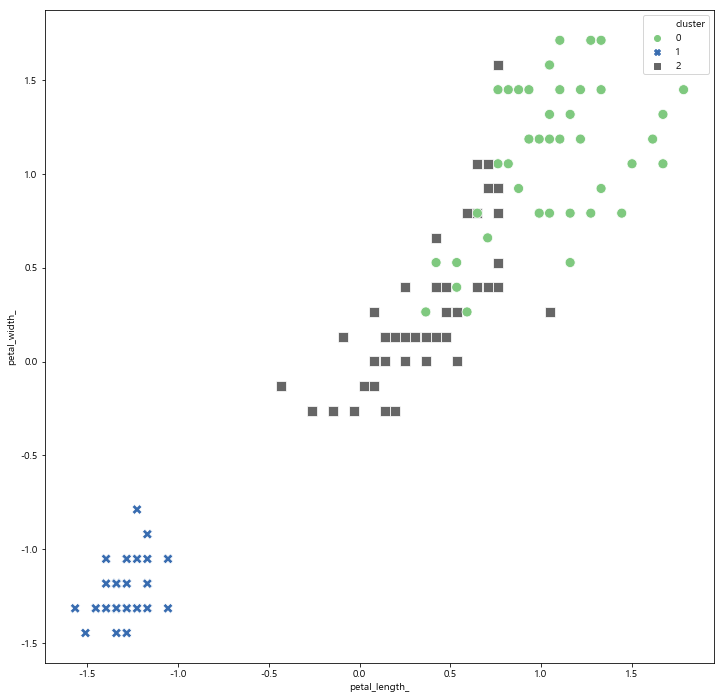

In [26]:
# 군집결과 시각화
df['cluster'] = kmeans_result
fig, ax = plt.subplots(1, 1)
sns.scatterplot(x='petal_length_', y='petal_width_', data=df, hue='cluster', style='cluster', s=100, ax=ax, palette='Accent')
plt.show()

#### DBSCAN (Density-based spatial clustering of applications with noise)
- 데이터의 밀집 지역(Dense region)이 한 클러스터를 구성하며 비교적 비어있는 지역을 경계로 다른 클러스터와 구분한다.
- 이 때 밀집 지역에 있는 데이터를 핵심 샘플이라고 한다.
- DBSCAN이 구분하는 데이터의 종류는 핵심 데이터, 경계 데이터(핵심 데이터에서 eps 거리 안에 있는 데이터), 그리고 잡음 데이터이다.
- DBSCAN을 한 데이터셋에 여러 번 실행하면 핵심과 잡음 데이터는 동일하게 분류되는데 경계 데이터는 한 개 이상의 클러스터로 분류될 수 있다.
- 데이터 포인트를 방문하는 순서에 따라 경계 데이터가 어떤 클러스터에 속할지가 달라지는 것이다.
- 하지만 보통 경계 데이터 포인트는 많지 않으며 포인트 순서 때문에 받는 영향도 적기 때문에 큰 문제는 아니다.

[군집 개수 k 정하는 방법]
- scikit-learn에서 제공하는 DBSCAN 클래스에는 데이터 분류와 관련한 두 개의 파라미터가 있는데 바로 eps와 min_samples이다.
- eps로 지정한 거리 안의 데이터들이 min_samples 개수 이상되면 이 데이터들을 핵심 샘플로 분류하며 하나의 클러스터를 이루게 된다.
- DBSCAN은 eps의 값을 조정함으로써 간접적으로 클러스터의 개수를 제어하고, min_samples를 통해서 클러스터의 최소 크기를 제어한다.
- eps와 min_samples를 조정하며 군집 평가 지표 값과 군집 시각화를 살핌으로써 최적의 군집 개수를 정할 수 있다.

[장단점]
- DBSCAN은 비선형과 같은 복잡한 형상을 찾을 수 있으며 어떤 클래스에도 속하지 않는 노이즈 데이터를 구분할 수 있다는 장점이 있다.
- 반면, 밀도가 높은 곳에 집중하기 때문에 밀도가 낮은 곳의 데이터를 하나의 군집으로 인식하지 못하고 노이즈 데이터로 구분할 수 있다.
- 병합 군집이나 K-means보다 다소 느리며, 데이터 수가 많아질수록 모델링 시간이 증가한다.

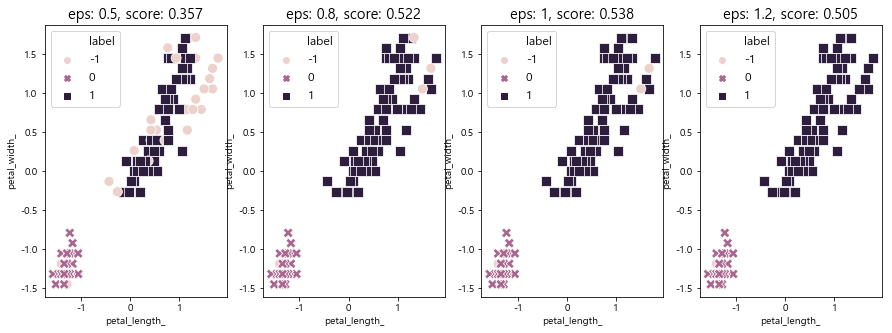

In [27]:
# 데이터 불러오기
from sklearn.datasets import load_iris

load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load['feature_names']))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(X), columns=columns)


# 적정한 eps 정하기 (min_samples는 10으로 고정함)
# eps를 증가시키면 하나의 클러스터에 더 많은 포인트가 포함된다.
# 이는 클러스터를 커지게 하지만 여러 클러스터를 하나로 합치게도 만든다.
# min_samples는 클러스터의 최소 크기를 결정한다.

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_list = [0.5, 0.8, 1, 1.2] # eps 후보군
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for ax, eps in zip(axes, eps_list):
    db = DBSCAN(eps=eps, min_samples=5).fit(df)
    temp_df = df.copy()
    temp_df['label'] = db.labels_
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df, hue='label', style='label', s=100, ax=ax)
    score = silhouette_score(df, db.labels_)
    ax.set_title(f"eps: {eps}, score: {round(score, 3)}")

plt.show()

In [28]:
# 확정한 eps를 기반으로 각 데이터의 군집을 반환
eps = 1
model = DBSCAN(eps=eps, min_samples=10).fit(df)
DB_result = model.labels_ # 각 데이터의 군집 반환
DB_result

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [29]:
# 군집 정보 확인
print(f"클러스터 구성: {Counter(model.labels_)}")
print(f"핵심 데이터 인덱스: {model.core_sample_indices_}")

클러스터 구성: Counter({1: 97, 0: 49, -1: 4})
핵심 데이터 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37
  38  39  40  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  58  59  61  62  63  64  65  66  67  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  86  88  89  90  91  92  94  95  96  97  98
  99 100 101 102 103 104 107 110 111 112 113 114 115 116 120 121 123 124
 125 126 127 128 129 130 132 133 134 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]


In [30]:
# 타당성 평가: clustering한 군집번호와 target의 군집번호가 꼭 일치할 필요는 없고, 유사한 데이터들끼리 군집화만 잘 되어있으면 된다.
from sklearn.metrics import silhouette_score, completeness_score

print(f"실루엣 계수: {round(silhouette_score(df, DB_result), 3)}")
print(f"completeness_score: {round(completeness_score(y, DB_result), 3)}")

실루엣 계수: 0.539
completeness_score: 0.837


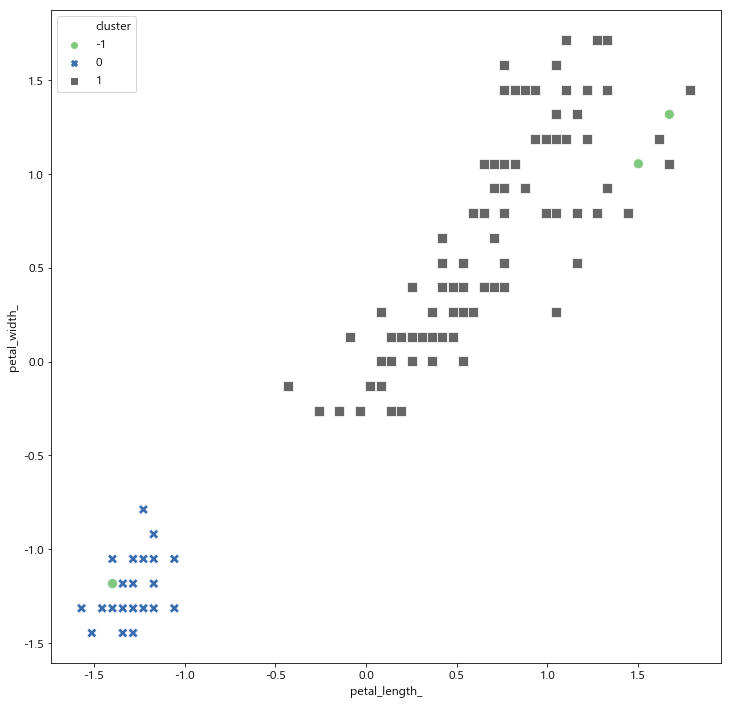

In [31]:
# 군집결과 시각화
df['cluster'] = DB_result
fig, ax = plt.subplots(1, 1)
sns.scatterplot(x='petal_length_', y='petal_width_', data=df, hue='cluster', style='cluster', s=100, ax=ax, palette='Accent')
plt.show()

#### 혼합분포군집
- 계층적 클러스터링과 K-means 같은 클러스터링 방법들은 모두 경험에 기반하여 발견하는 방법인 반면, 모델 기반(Model-based) 혹은 분포 기반(Distribution-based) 클러스터링은 통계 이론에 기초하고 있으며 클러스터의 성질과 수를 결정하는 더 엄격한 방법을 제공한다.
- 모델 기반 클러스터링의 목적은 데이터를 가장 잘 설명하는 다변량정규분포(Multivariate normal distribution)를 찾는 것이며, 클러스터들이 각자 서로 다른 확률분포로부터 발생한 것으로 가정한다.
- 전반적으로는 서로 비슷하지만 모든 데이터가 반드시 서로 가까울 필요는 없는 그룹과 서로 비슷하면서 데이터들이 아주 가까이에 있는 또 다른 그룹이 함께 있는 경우에 사용할 수 있다.

[기댓값 최대화 알고리즘 (EM, Expectation maximization)]
- 최대우도(Maximum likelihood)는 모델이 주어졌을 때 데이터의 조건부 확률이며, 모델을 변형시키면서 이 조건부 확률이 최대화되는 모델을 찾는다.
- 보통은 우도에 로그 값을 취한 로그우도를 최대화하는 방법으로 모델을 찾는다.

[군집 개수 k 정하는 방법]
- 여러 개의 분포의 개수들로 각각 클러스터링하여 BIC값이 가장 적고, 시각화 및 군집 타당성 지표 면에서 가장 유효한 모델을 판단하여 군집의 개수를 선택한다.

[장단점]
- 군집을 몇 개의 모수로 표현할 수 있고, 서로 다른 크기나 모양의 군집을 찾을 수 있다.
- 반면, 데이터들이 특정 분포를 따른다는 가정이 필요하며 클러스터링 결과는 이 가정을 만족했는지에 따라 매우 다르다.
- 필요한 계산량이 높아 대용량 데이터에는 적용이 어렵다.
- 알고리즘이 다른 방법들보다 더 복잡하고 이용하기가 어렵다.
- 또한, 이상값에 민감하기 때문에 전처리가 필요하다.

In [33]:
# 데이터 불러오기
from sklearn.datasets import load_iris

load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load['feature_names']))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(X), columns=columns)

적정한 분포 개수 정하기


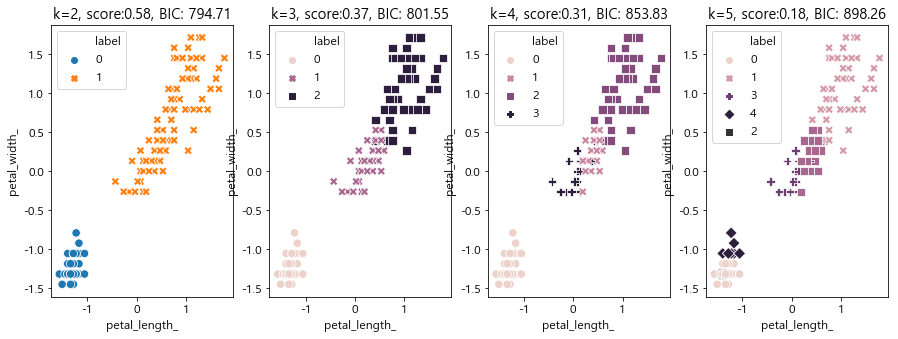

In [35]:
# 혼합분포 군집
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# 적정한 분포 개수 정하기(= 군집 개수 정하기)
print("적정한 분포 개수 정하기")
dist_list = [2, 3, 4, 5] # 분포 개수 후보군
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for ax, k in zip(axes, dist_list):
    gm = GaussianMixture(n_components=k, covariance_type='full').fit(df)
    
    # covariance type: {'full', 'tied', 'diag', 'spherical'}
    temp_df = df.copy()
    temp_df['label'] = gm.predict(df)
    
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df, hue='label', style='label', s=70, ax=ax)
    aic, bic = gm.aic(df), gm.bic(df)
    score = silhouette_score(df, temp_df['label'])
    ax.set_title(f"k={k}, score:{round(score, 2)}, BIC: {round(bic, 2)}")
    
plt.show()

In [37]:
# 확정한 k를 기반으로 각 데이터의 군집을 반환
k = 3
model = GaussianMixture(n_components=k).fit(df)
labels = model.predict(df)

GM_result = labels # 각 데이터의 군집 반환
GM_result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [40]:
# 군집 정보 확인
print(f"클러스터 구성: {Counter(labels)}")
print(f"distribution별 feature 평균: \n {model.means_[0]}, \n {model.means_[1]}")
print(f"distribution별 가중치: {model.weights_}")
print(f"모델의 로그가능도: {round(model.score(df), 3)}")

클러스터 구성: Counter({1: 55, 0: 50, 2: 45})
distribution별 feature 평균: 
 [-1.01457897  0.85326268 -1.30498732 -1.25489349], 
 [ 0.85158495 -0.24859804  0.98047264  1.03665053]
distribution별 가중치: [0.33333333 0.36571544 0.30095123]
모델의 로그가능도: -1.937


In [48]:
# 타당성 평가
from sklearn.metrics import silhouette_score, completeness_score

print(f"실루엣 계수: {round(silhouette_score(df, labels), 3)}")
print(f"completeness_score: {round(completeness_score(y, labels), 3)}")

실루엣 계수: 0.374
completeness_score: 0.901


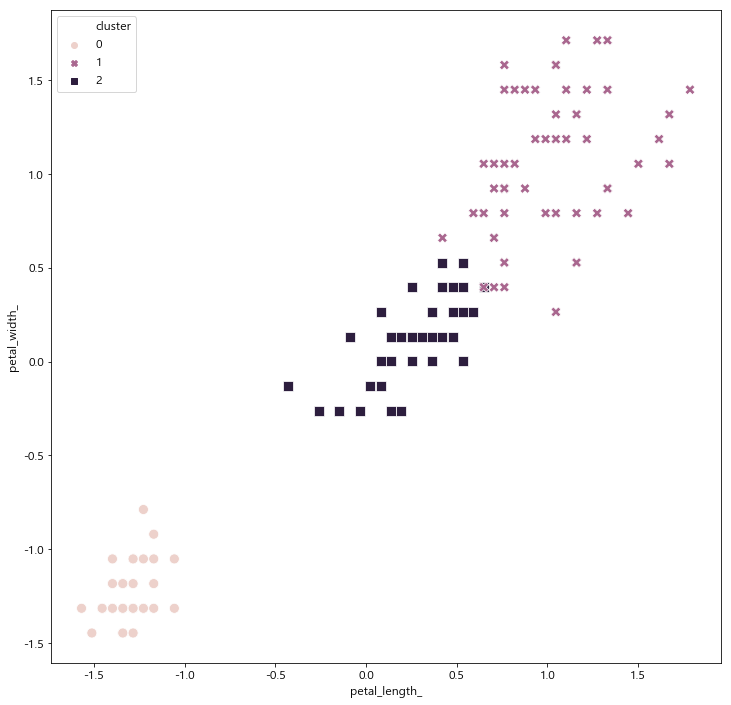

In [51]:
# 군집 결과 시각화
df['cluster'] = GM_result

fig, ax = plt.subplots(1, 1)
sns.scatterplot(x='petal_length_', y='petal_width_', data=df, hue='cluster', style='cluster', s=100, ax=ax)
plt.show()

#### SOM
- 1988년 Teuvo Kohonen에 의해 제안된 경쟁학습 알고리즘이다.
- SOM(Self-organized map)은 상대적 순환 보존(Relative ordering preservation) 혹은 위상 보존(Topology preservation)이라는 특징을 가진다.
- 이는 입력값의 상대적인 순서가 뉴런에서도 보존되는 것이며, 이 때문에 가까이 놓인 뉴런들이 비슷한 입력 값을 표현하고, 멀리 떨어진 뉴런들은 다른 일력값을 나타내게 된다. 
- SOM이 보통 1D, 2D의 행렬 뉴런으로 사용되는 데 반해 대부분의 입력 공간은 더 고차원적이므로 위상 보존이 항상 가능하지는 않다.

[군집 개수 k 정하는 방법]
- sklearn_som 라이브러리에서 제공하는 SOM은 2D 직사각형 SOM을 생성한다.
- 이 때 파라미터 m을 통해 SOM의 세로 크기, n을 통해 SOM의 가로 크기를 지정함으로써 네트워크의 크기를 설정할 수 있다.
- 이에 따라 데이터를 예측하면 m*n 개의 클러스터들을 생성한다.
- 네트워크의 크기 후보군들을 통해 가장 잘 작동하는 모델을 찾고 이 때 생성된 군집의 개수를 확인하면 된다.

[장단점]
- SOM은 입력 데이터들 사이의 위상을 잘 나타낸다.
- 또한, 잘 구별되지 않는 데이터 간의 상관관계를 찾아낼 수 있다.
- 비지도 학습으로서 클러스터링을 수행할 수 있다.
- 반면, 어떤 거리 지표를 선택하는지에 따라 클러스터 결과가 크게 달라질 수 있다.
- 수학 연산이 복잡하여 대용량 데이터 세트는 분석이 어렵다.

In [2]:
# 데이터 불러오기
from sklearn.datasets import load_iris

load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load['feature_names']))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(X), columns=columns)

In [ ]:
# SOM
from sklearn_som.som import SOM

# 적정한 네트워크의 크기 정하기 (=군집 개수 정하기)
print("적정한 네트워크의 크기 정하기:")
mn_list =[(2,1), (3,1), (2,2), (5,1)] # 분포 개수 후보군
fig, axes = plt.subplots(1,4, figsize = (15,5))
for ax, (M, N) in zip(axes, mn_list):
    som = SOM(m=M, n=N, dim=df.shape[1]) #dim은 입력 데이터의 feature의 개수
    som.fit(df.values) #배열을 입력해야 함 (df형태는 안됨)
    labels = som.predict(df.values)
    clusterNo = len(Counter(labels))
    temp_df = df.copy()
    temp_df['label']= som.predict(df.values)
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df, hue='label', style='label', s=70, ax=ax, palette='pastel')
    score = silhouette_score(df, temp_df['label'])
    ax.set_title("MxN={}x{}, k={}, score {:.2f}".format(M,N,clusterNo,score))
plt.show()

In [ ]:
# 확정한 k를 기반으로 각 데이터의 군집을 반환
M, N = (3, 1)
model = SOM(m=M, n=N, dim=df.shape[1])
model.fit(df.values)
labels = model.predict(df.values)
som_result = labels # 각 데이터의 군집 반환
print(som_result)

In [ ]:
# 군집 정보 확인
SOMmap = model.transform(df.values)
print("클러스터 구성: ", Counter(labels))
print("SOM map: \n", SOMmap[:5]) #앞 5개의 데이터 확인

In [ ]:
# 타당성 평가
from sklearn.metrics import silhouette_score, completeness_score
print("실루엣 계수: %.3f" %silhouette_score(df, labels))
print("completeness_score: %.3f" %completeness_score(y, labels))

In [ ]:
# 군집 결과 시각화
df['cluster'] = som_result
fig, ax = plt.subplots(1,1)
sns.scatterplot(x='petal_length_', y='petal_width_', data=df, hue='cluster', style='cluster', s=100, ax=ax, palette='Accent')
plt.show()

## 10-3. 연관규칙학습
- 연관규칙학습(Association rule learning)은 큰 데이터베이스에서 변수들 간의 흥미로운 관계를 발견하기 위한 규칙 기반 기계 학습 방법이다.
- 장바구니 분석, 웹 사용 마이닝, 침입 탐지, 생물정보학 등 많은 응용 분야에서 사용된다.
- 한편, 서열 분석(Sequential analysis)은 연관규칙학습에 시간이라는 개념을 포함시켜 순차적으로 구매 가능성이 큰 상품군을 찾아내는 것이다.

[연관규칙학습의 측도]
- A는 조건절(Antecedent), C는 결과절(Consequent)을 의미한다.
    - 지지도(Support): (A와 C가 동시에 포함된 거래 수 / 전체 거래 수)로 구하며 범위는 0~1이다.
        - $support(A \to C) = P(A \cup C)$
    - 신뢰도(Confidence): (A와 C가 동시에 포함된 거래 수 / A가 포함된 거래 수)로 구하며 범위는 0~1이다.
        - $confidence(A \to C) = P(C|A)$
    - 향상도(Lift): (A와 C가 동시에 포함된 거래 수 * 전체 거래 수) / (A가 포함된 거래 수 * C가 포함된 거래 수)로 구하며, A가 구매되지 않았을 때 품목 C의 구매확률에 비해 A가 구매됐을 때 품목 C의 구매확률의 증가 비를 의미한다. A와 C의 구매가 서로 관련이 없는 경우에 향상도가 1 이하가 되며, 범위는 $0 \sim \infty $이다.
        - $lift(A \to C) = P(C|A)/P(C)$
    - 레버리지(Leverage): A와 C가 함께 나타나는 관찰된 빈도와 A와 C가 독립적인 경우 예상되는 빈도 간의 차이를 계산한다. 레버리지 값이 0이면 연관이 없고, -1이나 1에 가까울수록 연관이 있다. 범위는 -1에서 1이다.
        - $leverage(A \to C) = support(A \to C) - support(A) \times support(C) $
    - 확신(Conviction): conviction값이 높다는 것은 consequent가 antecedent에 크게 의존한다는 것을 의미한다. 이 값이 1이면 A와 C는 독립이고, 1보다 크면 A가 C의 발생여부를 예측하는데 유효한 품목이 되는 것이고, 1보다 작으면 유용하지 않은 품목이 된다. 범위는$0 \sim \infty $이다.
        - $conviction(A \to C) = (1-support(C)) / (1-confidence(A \to C))$

[연관규칙학습 알고리즘]
- 최소지지도보다 큰 지지도 값을 갖는 품목의 집합을 빈발항목집합(Frequent item set)이라고 한다.
- Apriori 알고리즘은 모든 품목집합에 대한 지지도를 전부 계산하는 것이 아니라 최소 지지도 이상의 빈발항목 집합을 찾은 후 그것들에 대해서만 연관규칙을 계산한다.
- Apriori는 1994년에 발표된 1세대 알고리즘으로 구현과 이해하기 쉽다는 장점이 있으나 지지도가 낮은 후보 집합 생성 시 아이템의 개수가 많아지면 계산 복잡도가 증가한다는 문제점을 가지고 있다.
- FP-Growth 알고리즘은 후보 빈발항목 집합을 생성하지 않고 FP-Tree(Frequent pattern tree)를 만든 후 분할정복 방식을 통해 Apriori 알고리즘보다 더 빠르게 빈발항목 집합을 추출할 수 있는 방법이다.
- Apriori 알고리즘의 약점을 보완하기 위해 고안된 것으로 데이터베이스를 스캔하는 횟수가 작고 빠른 속도로 분석이 가능하다.

[장단점]
- 조건과 결과로 표현되는 연관성 분석의 내용을 쉽게 이해할 수 있다.
- 분석 방향이나 목적이 특별히 없는 경우 목적변수가 없으므로 유용하게 활용된다.
- 사용이 편리한 분석 데이터의 형태로 거래 내용에 대한 데이터를 변환 없이 그 자체로 이용할 수 있는 간단한 자료 구조를 가진다.
- 분석을 위한 계산이 간단하다.
- 반면, 품목 수가 증가하면 분석에 필요한 계산은 기하급수적으로 늘어나며, 너무 세분화한 품목을 갖고 연관성 규칙을 찾으면 의미 없는 분석이 될 수도 있다.
- 이를 개선하기 위해 유사한 품목을 한 범주로 일반화할 수 있다.
- 거래량이 적은 품목은 포함된 거래수가 적어서 규칙 발견 시 제외되기 쉽다는 단점이 있다.
- 이런 경우, 그 품목이 중요한 품목이라면 유사한 품목들과 함께 범주로 구성하는 방법 등을 통해 연관성 규칙의 과정에 포함시킬 수 있다.

In [6]:
# Transaction data (거래내역 데이터) 생성하기

# !pip install mlxtend --no-deps --user
from mlxtend.preprocessing import TransactionEncoder

dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)

# 각 거래품목에 대한 거래 여부를 표시하는 데이터로 전처리 완료
df = pd.DataFrame(te_ary, columns=te.columns_).applymap(lambda x: 1 if x else 0)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,0,0,0,1,0,1,1,1,1,0,1
1,0,0,1,1,0,1,0,1,1,0,1
2,1,0,0,1,0,1,1,0,0,0,0
3,0,1,0,0,0,1,1,0,0,1,1
4,0,1,0,1,1,1,0,0,1,0,0


In [7]:
# Apriori 알고리즘으로 연관규칙학습
# 빈발항목집합 생성
from mlxtend.frequent_patterns import apriori

fset = apriori(df, min_support=0.6, use_colnames=True, verbose=0)
print(f"빈발항목집합: \n {fset.sort_values(by='support', ascending=False)}")

빈발항목집합: 
     support                     itemsets
1       1.0               (Kidney Beans)
0       0.8                       (Eggs)
5       0.8         (Eggs, Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
6       0.6                (Eggs, Onion)
7       0.6         (Kidney Beans, Milk)
8       0.6        (Kidney Beans, Onion)
9       0.6       (Yogurt, Kidney Beans)
10      0.6  (Eggs, Kidney Beans, Onion)


C:\Users\kimmi\AppData\Roaming\Python\Python37\site-packages\mlxtend\frequent_patterns\fpcommon.py:113: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


In [8]:
# 연관규칙 생성
from mlxtend.frequent_patterns import association_rules

# metric = {'support', 'confidence', 'lift', 'leverage', 'conviction'}
# min_threshold = metric 파라미터 값의 최솟값 설정
rule = association_rules(fset, metric='confidence', min_threshold=0.7)
rule['len_ant'] = rule['antecedents'].apply(lambda x: len(x))
rule['len_con'] = rule['consequents'].apply(lambda x: len(x))

# consequents 항목이 1이고, lift가 1.2 이상인 rule만 확인
print("연관규칙:")
rule[(rule['len_con']==1) & (rule['lift']>=1.2)]

연관규칙:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,len_ant,len_con
2,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0,1,1
3,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5,1,1
7,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0,2,1
9,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5,2,1


In [9]:
# FP Growth 알고리즘으로 연관규칙 학습
# 빈발항목집합 생성
from mlxtend.frequent_patterns import fpgrowth
fset = fpgrowth(df, min_support=0.6, use_colnames=True, verbose=0)
print(f"빈발항목집합: \n {fset.sort_values(by='support', ascending=False)}")

빈발항목집합: 
     support                     itemsets
0       1.0               (Kidney Beans)
1       0.8                       (Eggs)
5       0.8         (Eggs, Kidney Beans)
2       0.6                     (Yogurt)
3       0.6                      (Onion)
4       0.6                       (Milk)
6       0.6       (Yogurt, Kidney Beans)
7       0.6                (Eggs, Onion)
8       0.6        (Kidney Beans, Onion)
9       0.6  (Eggs, Kidney Beans, Onion)
10      0.6         (Kidney Beans, Milk)


C:\Users\kimmi\AppData\Roaming\Python\Python37\site-packages\mlxtend\frequent_patterns\fpcommon.py:113: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


In [11]:
# 연관규칙 생성
from mlxtend.frequent_patterns import association_rules

# metric = {'support', 'confidence', 'lift', 'leverage', 'conviction'}
# min_threshold = metric 파라미터 값의 최솟값 설정
rule = association_rules(fset, metric='confidence', min_threshold=0.7)
rule['len_ant'] = rule['antecedents'].apply(lambda x: len(x))
rule['len_con'] = rule['consequents'].apply(lambda x: len(x))

# consequents 항목이 1이고, lift가 1.2 이상인 rule만 확인
print("연관규칙:")
rule[(rule['len_con']==1) & (rule['lift']>=1.2)]

# lift 1.25인 규칙들의 경우, Eggs를 사는 사람은 (Kidney Beans, Onion)를 살 확률이 다소 높다는 의미이다.
# leverage 0.12인 규칙들의 경우, 0에 가깝기 때문에 연관이 커 보이지 않는다.
# conviction 값들은 1 이상이기 때문에 어느 정도 C 항목의 발생 여부를 예측하는데 유용하다고 볼 수 있다.

연관규칙:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,len_ant,len_con
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0,1,1
4,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5,1,1
6,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0,2,1
8,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5,2,1


## 연습문제

#### 1.
- 다음은 신용카드 사용자 데이터이다. 데이터는 신용카드 사용 행태를 나타내는 입력 변수들로 구성되어 있다.
- 데이터 컬럼 정의서는 아래와 같을 때, 2개의 군집 분석 알고리즘으로 각각 군집을 생성하고 군집 생성 과정을 설명하시오.

|컬럼명|설명|
|-|-|
|cust_id|신용카드 사용자 ID|
|balance|구매계좌 잔액|
|balance_frequency|구매 계좌 잔액이 업데이트 되는 빈도 지수, 0(자주 업데이트 되지 않음) ~ 1(자주 업데이트 됨)|
|purchases|구매 계좌로부터의 구매액|
|purchases_frequency|구매 빈도 지수, 0(자주 구매하지 않음) ~ 1(자주 구매함)|
|purchases_trx|구매 거래 건수|

In [12]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice10_credit_card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_TRX
0,C10001,40.900749,0.818182,95.40,0.166667,2
1,C10002,3202.467416,0.909091,0.00,0.000000,0
2,C10003,2495.148862,1.000000,773.17,1.000000,12
3,C10004,1666.670542,0.636364,1499.00,0.083333,1
4,C10005,817.714335,1.000000,16.00,0.083333,1


In [13]:
# 데이터 전처리
# cust_id는 범주형 변수로서 각 고객을 식별할 뿐이기 때문에 군집 분석에서는 제외하였다.
df2 = df.drop('CUST_ID', axis=1)

# 그 후, 변수 간 스케일 차이로 인한 왜곡이 일어나지 않도록 표준화를 진행하였다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled = pd.DataFrame(ss.fit_transform(df2), columns=df2.columns)

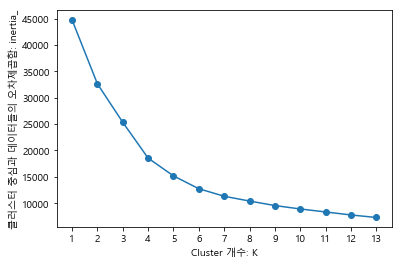

In [17]:
# K-means 클러스터링과 혼합분포 군집 알고리즘으로 각각 군집을 생성하고자 한다.
# K-means는 후보 군집 개수에 따른 오차제곱합들을 살펴,
# scree plot을 통해 elbow 방법으로 오차제곱합이 평평해지기 시작하는 지점의 군집 개수로 데이터를 군집화하고자 한다.
from sklearn.cluster import KMeans
from collections import Counter

I = [] # 오차제곱합
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k).fit(scaled)
    I.append(kmeans.inertia_) # 오차제곱합
    
plt.plot(list(range(1, 14)), I, marker='o')
plt.xticks(list(range(1, 14)), list(range(1, 14)))
plt.xlabel("Cluster 개수: K")
plt.ylabel("클러스터 중심과 데이터들의 오차제곱합: inertia_")
plt.show() # 팔꿈치 지점으로 보이는 4를 군집의 개수로 정하기로 한다.

In [76]:
# n_cluster=4로 군집화
Kmodel = KMeans(n_clusters=4, random_state=0)
Kmodel.fit(scaled) # 해당 열 데이터의 각 cluster center와의 거리
kmeans_result = Kmodel.labels_ # 각 데이터의 군집 반환
print(Counter(kmeans_result))

# 타당성 평가
from sklearn.metrics import silhouette_score
print(f"실루엣 계수: {round(silhouette_score(scaled, kmeans_result), 3)}")

Counter({2: 3603, 1: 3478, 0: 1486, 3: 383})
실루엣 계수: 0.422


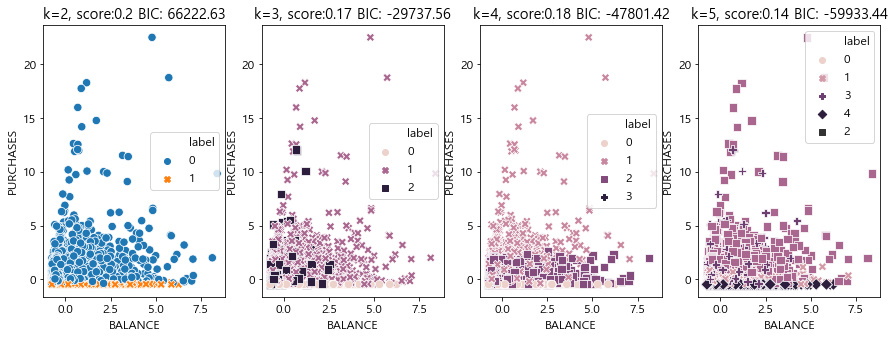

In [78]:
# 혼합분포군집 방법으로는 분포 개수 후보군으로 적합한 각각의 결과를 실루엣 계수와 BIC로 비교하고 가장 타당한 분포 개수를 정하고자 한다.
dist_list = [2, 3, 4, 5]
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for ax, k in zip(axes, dist_list):
    gm = GaussianMixture(n_components=k, covariance_type='full').fit(scaled)
    temp_df = scaled.copy()
    temp_df['label'] = gm.predict(scaled)
    sns.scatterplot(x='BALANCE', y='PURCHASES', data=temp_df, hue='label', style='label', s=70, ax=ax)
    aic, bic = gm.aic(scaled), gm.bic(scaled)
    score = silhouette_score(scaled, temp_df['label'])
    ax.set_title(f"k={k}, score:{round(score, 2)} BIC: {round(bic ,2)}")
    
plt.show() # 비교적 실루엣 스코어가 높고 BIC가 낮은 것으로 보이는 분포 개수 4개로 정하기로 한다.

In [79]:
# n_components=4로 군집화
Gmodel = GaussianMixture(n_components=4)
Gmodel.fit(scaled)

GM_result = Gmodel.predict(scaled)
print(Counter(GM_result))

# 타당성 평가
from sklearn.metrics import silhouette_score
print(f"실루엣 계수: {round(silhouette_score(scaled, GM_result), 3)}")

Counter({1: 4496, 3: 2040, 0: 1426, 2: 988})
실루엣 계수: 0.175


#### 2. 
- 두 모델을 비교하고, 더 타당한 모델을 선택하시오.

In [80]:
# 두 분포 모두 각 군집별 데이터의 개수는 고르게 배치된 것으로 보이지만, 실루엣 계수로 미루어볼 때 군집 내의 응집도와 
# 군집 간 분리도가 더 높은 K-means(0.422)의 결과가 혼합분포군집(0.175)의 결과보다 더 타당한 것으로 보인다.
# 이에 K-means 모델을 선택하고자 한다.

#### 3.
- 선택한 모델로 생성한 군집들의 고객 특성을 분석하시오.

In [88]:
df['cluster'] = kmeans_result
df['cluster'].value_counts().sort_index()

0    1486
1    3478
2    3603
3     383
Name: cluster, dtype: int64

In [86]:
# 군집0은 1485개의 고객이 해당되는 군집으로서 구매계좌 잔액 평균 155.46에, 계좌 업데이트 빈도지수 평균이 0.40이며,
# 구매액 평균이 353.70이고, 구매 빈도지수 평균은 0.28이고, 거래 건수 평균은 4.45의 특성을 보인다.
# 해당 군집은 구매계좌 잔액과 계좌 업데이트 빈도가 낮고, 구매액과 구매빈도도 낮은 '낮은 구매력 고객'으로 정의할 수 있다.

df[df['cluster']==0].describe().round(2).iloc[:, :-1]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_TRX
count,1486.00,1486.00,1486.00,1486.00,1486.00
mean,155.36,0.40,353.52,0.28,4.45
std,333.61,0.20,529.22,0.27,5.22
min,0.00,0.00,0.00,0.00,0.00
25%,7.59,0.27,33.54,0.08,1.00
50%,29.41,0.45,161.50,0.18,3.00
75%,131.32,0.55,441.62,0.42,6.00
max,3947.75,0.75,5252.04,1.00,41.00


In [89]:
# 군집 1은 3478명의 고객이 해당되는 군집으로서 구매계좌 잔액 평균 2397에 계좌 업데이트 빈도지수 평균이 0.98이며, 
# 구매액 평균이 230.47이고, 구매 빈도지수 평균은 0.13이고, 거래 건수 평균은 2.38의 특성을 보인다.
# 해당 군집은 구매계좌 잔액과 계좌 업데이트 빈도지수는 높은 편이지만, 실제 구매는 많이 이루어지지 않는 군집이다.
# "잠재 구매력 고객"으로 정의할 수 있다.

df[df['cluster']==1].describe().round(2).iloc[:, :-1]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_TRX
count,3478.00,3478.00,3478.00,3478.00,3478.00
mean,2397.40,0.98,230.47,0.13,2.38
std,2281.64,0.06,465.86,0.18,3.85
min,0.49,0.55,0.00,0.00,0.00
25%,924.57,1.00,0.00,0.00,0.00
50%,1603.21,1.00,0.52,0.08,1.00
75%,3098.06,1.00,255.61,0.25,4.00
max,16304.89,1.00,4900.00,1.00,34.00


In [90]:
# 군집2는 3604개의 고객이 해당되는 군집으로서 구매계좌 잔액 평균 1084.17에, 계좌 업데이트 빈도지수 평균이 0.97이며,
# 구매액 평균이 1316.54이고, 구매 빈도지수 평균은 0.87이고, 거래 건수 평균은 21.97의 특성을 보인다.
# 전체 고객의 40%가 군집 2에 해당할 만큼 일반적인 군집 특성을 가진다.
# 구매계좌 잔액과 구매액은 일반적이지만 계좌 업데이트 빈도는 매우 높고, 구매 빈도지수도 높은 편이며, 거래 건수도 높은 편에 속한다.
# "높은 구매력 고객"으로 정의할 수 있다.

print(df[df['cluster']==2].describe().round(2).iloc[:, :-1])

        BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
count   3603.00            3603.00    3603.00              3603.00   
mean    1084.46               0.97    1316.88                 0.87   
std     1450.19               0.08    1166.21                 0.16   
min        0.73               0.45       8.40                 0.25   
25%      111.85               1.00     463.16                 0.75   
50%      483.40               1.00     938.20                 0.92   
75%     1464.95               1.00    1840.66                 1.00   
max    11734.27               1.00    8591.31                 1.00   

       PURCHASES_TRX  
count        3603.00  
mean           21.97  
std            14.68  
min             0.00  
25%            12.00  
50%            17.00  
75%            28.00  
max            98.00  


In [91]:
# 군집3은 383개의 고객이 해당되는 군집으로서 구매계좌 잔액 평균 3983.54에, 계좌 업데이트 빈도지수 평균이 0.99이며,
# 구매액 평균이 7590.20이고, 구매 빈도지수 평균은 0.96이고, 거래 건수 평균은 98.16의 특성을 보인다.
# 군집3은 4개의 군집 중에서 고객수는 가장 적지만, 구매계좌 사용, 구매액, 구매빈도, 거래건수가 가장 높고 활발한
# '슈퍼 구매력 고객'이라고 정의할 수 있다.

print(df[df['cluster']==3].describe().round(2).iloc[:, :-1])

        BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
count    383.00             383.00     383.00               383.00   
mean    3983.54               0.99    7590.20                 0.96   
std     3431.34               0.05    6288.93                 0.13   
min      137.64               0.27     885.44                 0.17   
25%     1216.19               1.00    4121.02                 1.00   
50%     2986.42               1.00    5779.36                 1.00   
75%     5768.60               1.00    8731.10                 1.00   
max    19043.14               1.00   49039.57                 1.00   

       PURCHASES_TRX  
count         383.00  
mean           98.16  
std            54.14  
min             3.00  
25%            67.50  
50%            87.00  
75%           114.00  
max           358.00  


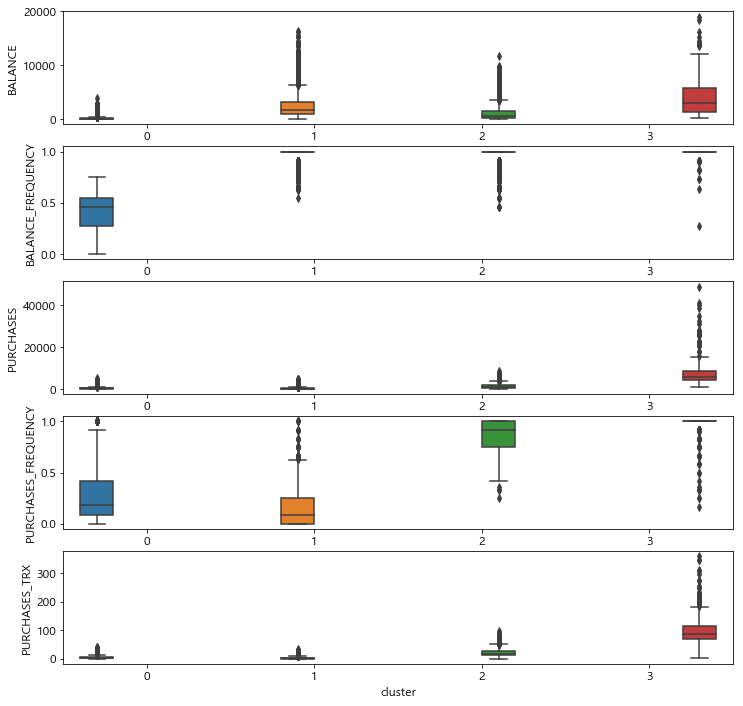

In [92]:
# 특성별 각 군집의 데이터 분포는 아래와 같이 시각화 할 수 있다.
fig, axes = plt.subplots(5, 1)
for ax, col in zip(axes, ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'PURCHASES_FREQUENCY', 'PURCHASES_TRX']):
    sns.boxplot(x='cluster', y=col, hue='cluster', data=df, ax=ax)
    ax.legend().remove()
    
plt.show()

#### 4.
- 고객 특성이 다음과 같다면 어느 군집으로 분류하는 것이 타당한지 서술하시오.
    - balance: 3000
    - balance_frequeny: 1
    - purchases: 6000
    - purchases_frequency: 1
    - purchases_trx: 100

In [93]:
# 주어진 데이터를 앞서 표준화한 기준으로 정규화하고, 적합한 군집 모델로 예측한 결과 군집 3이 나왔다.
Kmodel.predict(ss.transform([[3000, 1, 6000, 1, 100]]))

array([3])

#### 5.
- 각 군집들을 대상으로 마케팅 전략을 수립하시오.

In [ ]:
# 여러 군집들 중에서도 군집 1을 메인 타겟으로 한 마케팅 전략을 제안한다.
# 군집 1에 해당하는 고객들은 전체의 39%를 차지하며 규모가 클 뿐만 아니라,
# 구매계좌 잔액, 계좌 업데이트 빈도 지수를 미루어보아 구매력이 높은 집단으로 판단되기 때문이다.
# 다만, 현재 해당 군집의 구매액, 구매빈도, 거래 건수가 낮은 이유는 해당 군집들이 필요로 하는 제품의 라인업이 부족하거나
# 구매 과정상의 동선, 프로모션 부족 등의 문제가 있을 것으로 예상한다.
# 이러한 문제점을 파악하여 제품 라인업을 보충하고, 구매 과정 상의 동선을 확인하거나 해당 군집을 대상으로 한 프로모션을 기획하기를 제안한다.